In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,AGE,SEX,CHESTPAIN,RESTBP,CHOL,SUGAR,ECG,MAXHR,ANGINA,DEP,EXERCISE,FLUOR,THAL,OUTPUT
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
df.describe()

,AGE,SEX,CHESTPAIN,RESTBP,CHOL,SUGAR,ECG,MAXHR,ANGINA,DEP,EXERCISE,FLUOR,THAL,OUTPUT
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        270 non-null    int64  
 1   SEX        270 non-null    int64  
 2   CHESTPAIN  270 non-null    int64  
 3   RESTBP     270 non-null    int64  
 4   CHOL       270 non-null    int64  
 5   SUGAR      270 non-null    int64  
 6   ECG        270 non-null    int64  
 7   MAXHR      270 non-null    int64  
 8   ANGINA     270 non-null    int64  
 9   DEP        270 non-null    float64
 10  EXERCISE   270 non-null    int64  
 11  FLUOR      270 non-null    int64  
 12  THAL       270 non-null    int64  
 13  OUTPUT     270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'CHESTPAIN'}>,
        <AxesSubplot:title={'center':'RESTBP'}>],
       [<AxesSubplot:title={'center':'CHOL'}>,
        <AxesSubplot:title={'center':'SUGAR'}>,
        <AxesSubplot:title={'center':'ECG'}>,
        <AxesSubplot:title={'center':'MAXHR'}>],
       [<AxesSubplot:title={'center':'ANGINA'}>,
        <AxesSubplot:title={'center':'DEP'}>,
        <AxesSubplot:title={'center':'EXERCISE'}>,
        <AxesSubplot:title={'center':'FLUOR'}>],
       [<AxesSubplot:title={'center':'THAL'}>,
        <AxesSubplot:title={'center':'OUTPUT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

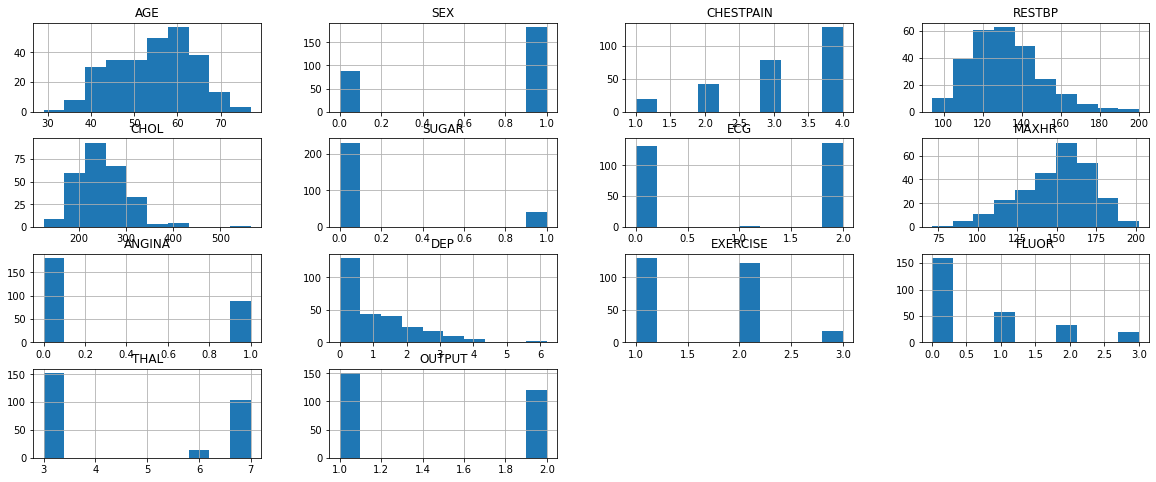

In [6]:
plt.rcParams['figure.figsize'] = (20,8)
df.hist()

In [7]:
y = df['OUTPUT']
df.drop('OUTPUT', axis=1,inplace=True)

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [9]:
labelEncoder = LabelEncoder()
df['DEP'] = labelEncoder.fit_transform(y=df['DEP'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=17)

In [11]:
tree = DecisionTreeClassifier(random_state=17, max_depth=3, min_samples_leaf=2)
tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=17)

In [12]:
tree.score(X_test, y_test)

0.7407407407407407

In [13]:
preds = tree.predict(X_test)
accuracy_score(y_true=y_test, y_pred=preds)

0.7407407407407407

Let's use GridSearch and Stratified K-fold Cross-validation

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [16]:
# Let's vary hyperparameters from 2 - 10
best_parameters = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}
decision_tree = DecisionTreeClassifier(criterion='entropy') # for information gain and entropy
model = GridSearchCV(estimator=decision_tree, param_grid=best_parameters, n_jobs=-1, verbose=1, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=17))
model.fit(X_train, y_train)
model.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 4, 'min_samples_leaf': 3}

In [17]:
model.best_score_

0.7777777777777778

In [18]:
preds_2 = model.predict(X_test)

In [19]:
accuracy_score(y_test, preds_2)

0.8148148148148148

We can notice that we got a improvement in the results when we use a grid search to find optimal hyperparameters.